## import packages

In [1]:
from Utils.Models import *  
from Utils.Densenet import *
from ultralytics import YOLO

In [2]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

## import Data

In [2]:
Property = [1,0]
Property = [0.3,0.7]
# Property = [0,1]
seed = 54
map_lenght = 25
zmax = 512

X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)
read_dir = '/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/densnet/init'
parameter, num_of_dipoles,kind_of_data, bbox,data,gass_id,n_of_each = read_data(read_dir,'parameter', 'num_of_dipoles','kind_of_data', 'bbox','data','gass_id','n_of_each')

## train YOLO

In [5]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')


Transferred 355/355 items from pretrained weights


In [7]:
results = model.train(data='YOLOv8/my_Model_training/parameters/shaoliang_qiu_data.yaml', epochs=20)

Ultralytics YOLOv8.1.47 🚀 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=YOLOv8/my_Model_training/parameters/shaoliang_qiu_data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /home/jiajianhao/文档/cnn/my_Magnetic_methods-master/YOLOv8/my_Model_training/data/shaoliang_qiu_data/train.cache... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<?, ?it/s]
val: Scanning /home/jiajianhao/文档/cnn/my_Magnetic_methods-master/YOLOv8/my_Model_training/data/shaoliang_qiu_data/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.96G      2.011       2.74      1.525         61        640: 100%|██████████| 14/14 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         40        209     0.0172      0.986      0.367     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.98G      1.315      1.311      1.108         34        640: 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         40        209     0.0174          1      0.973      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.94G      1.249      1.095      1.106         19        640: 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         40        209          1       0.78      0.995      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.92G      1.173      0.948      1.047         26        640: 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         40        209       0.99      0.918      0.984      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.92G       1.13     0.8309       1.05         47        640: 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         40        209          1      0.997      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.91G       1.08     0.8106      1.028         25        640: 100%|██████████| 14/14 [00:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         40        209      0.999          1      0.995      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.93G      1.053     0.7828      1.036         21        640: 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         40        209      0.998          1      0.995      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.93G      1.008     0.7539     0.9929         39        640: 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         40        209      0.999          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.93G     0.8931     0.6792     0.9651         25        640: 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         40        209      0.996      0.995      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.93G     0.9352     0.7362     0.9717         12        640: 100%|██████████| 14/14 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         40        209      0.999          1      0.995       0.85


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       3.9G     0.7697     0.6477     0.9275         20        640: 100%|██████████| 14/14 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         40        209          1      0.999      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       3.9G     0.7604     0.6239     0.9193         20        640: 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         40        209      0.981      0.992      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       3.9G     0.8203     0.6513      0.932         26        640: 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         40        209      0.995          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.9G     0.7029     0.6042     0.9056         19        640: 100%|██████████| 14/14 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         40        209      0.999          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       3.9G     0.6387     0.5385     0.8757         15        640: 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         40        209      0.985          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.9G     0.5967     0.5197     0.8643         23        640: 100%|██████████| 14/14 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         40        209      0.999          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       3.9G     0.6135     0.5144     0.8718         17        640: 100%|██████████| 14/14 [00:02<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         40        209      0.999          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       3.9G      0.622     0.5028     0.8717         22        640: 100%|██████████| 14/14 [00:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         40        209      0.999          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       3.9G     0.5461     0.4896     0.8551         21        640: 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         40        209      0.999          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       3.9G      0.535     0.4863     0.8613         12        640: 100%|██████████| 14/14 [00:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         40        209          1          1      0.995      0.908



20 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]


                   all         40        209          1          1      0.995      0.907
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train2


## train Densenet

### 全部训练集处理

In [3]:
den_data = cov_to_densenet(parameter, num_of_dipoles, bbox,data)
den_data.shape

(4000, 9, 64, 64)

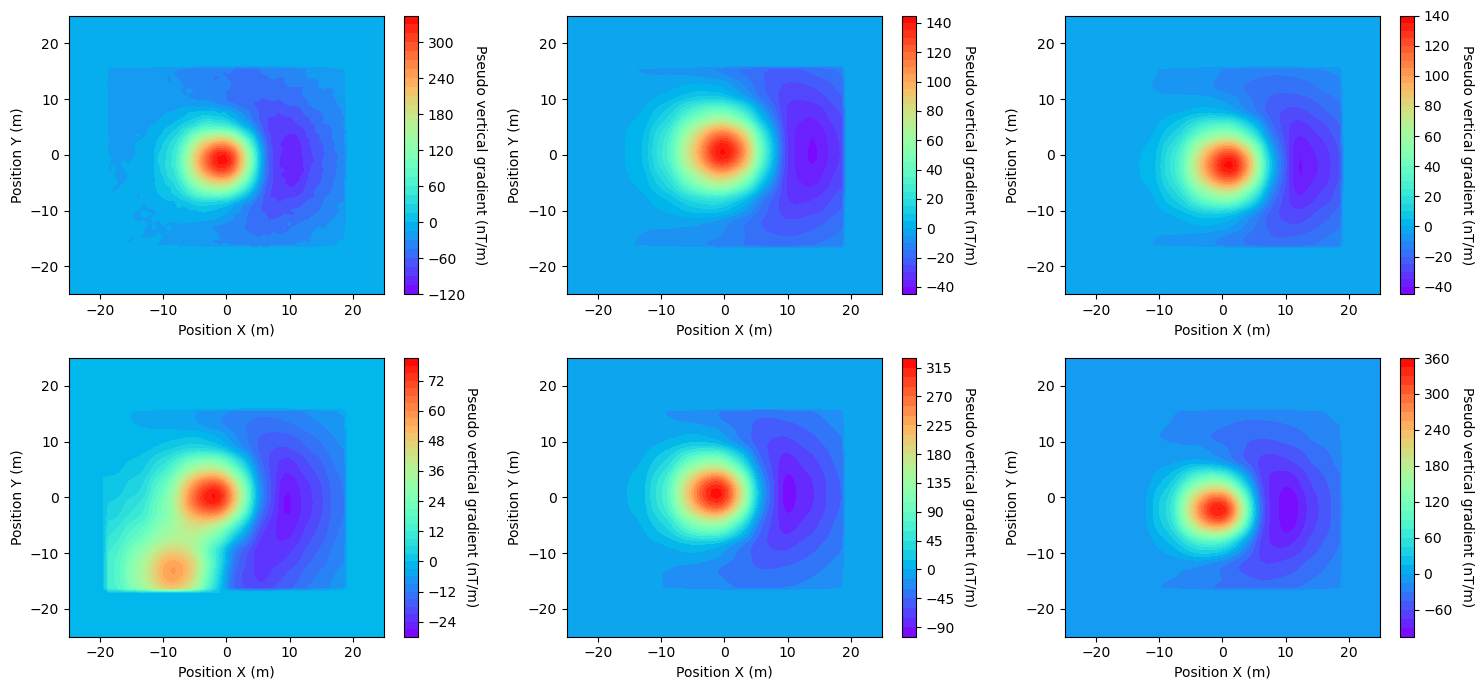

In [8]:
plot_densenet_data(den_data)

In [4]:
data,para = fliter_acdt_type(n_of_each, parameter, num_of_dipoles,den_data, kind_of_data)

In [5]:
dipole_data,ellipse_data = data['0'],data['1']
dipole_para,ellipse_para = para['0'],para['1']

In [6]:
dipole_data_img = gray_to_rgb(dipole_data)
ellipse_data_img = gray_to_rgb(ellipse_data)

### 球体train

In [7]:
# 球体训练集
train_data, train_para, val_data, val_para, test_data, test_para = split_data(dipole_data_img,dipole_para)
train_data.shape

(3829, 64, 64, 3)

In [8]:
# 仅使用深度和半径参数
train_para,val_para,test_para = para_select(2,4,train_para,val_para,test_para)

In [14]:
Densenet_121 = tf.keras.applications.DenseNet121(
                                                include_top=False,  # 不包括全连接层, 可能主要用于提取特征, 而不分类
                                                weights="imagenet",  # 通过imagNet预训练
                                                input_tensor=None,
                                                input_shape=dipole_data_img.shape[1:],
                                                pooling=None,  # 不采用平均池化
                                                classes=1000, 
                                                )

# Densenet_121.summary()


In [17]:
nb_dense_block=0 
growth_rate=32
nb_filter=256
reduction=0.0
dropout_rate=0.0
weight_decay=1e-4

nb_layers = [6,12]

compression = 0.5

l2_regularizer = 0.005

####################

x = Densenet_121.layers[140].output

for block_idx in range(nb_dense_block):

  stage = block_idx+4
  x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

  # Add transition_block
  x = transition_block(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate, weight_decay=weight_decay)
  nb_filter = int(nb_filter * compression)

#final_stage = stage + 1
#x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

x = GlobalAveragePooling2D(name='Global_Average_Pooling_2D')(x)

x = Dense(256, kernel_initializer='GlorotUniform', kernel_regularizer=l2(l2_regularizer))(x)
x = Activation("relu")(x)

x = Dense(train_para.shape[1], activation= "linear", name='rotation')(x)

model = Model(inputs = Densenet_121.input, outputs = x)

for layer in model.layers[:141]:
#for layer in position_model.layers[:9]:
  layer.trainable=True
for layer in model.layers[141:]:
#for layer in position_model.layers[9:]:
  layer.trainable=True

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [18]:
model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

In [14]:
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [15]:
%%time

# 
path = 'content/my_Densenet_par_9_TL_dipoles.hdf5'

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=15, verbose=0)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(path, monitor="val_loss", verbose=0, save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode="min",
                                                         patience=10, min_lr=0.00001, verbose=1)

####### Training #####
# train_data, train_para, val_data, val_para, test_data, test_para = split_data(dipole_data_img,dipole_para)

model.fit(train_data, train_para, validation_data=(val_data, val_para), batch_size=32, epochs=70, 
             callbacks=[earlystopping, reduce_lr, model_checkpoint])
                                                        


2024-04-14 13:41:28.536773: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-14 13:41:28.537388: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499780000 Hz


Epoch 1/70


2024-04-14 13:41:32.686693: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-14 13:41:33.508364: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


120/120 [==============================] - 14s 43ms/step - loss: 1.9419 - r2: -0.8032 - val_loss: 1.5076 - val_r2: 0.3414
Epoch 2/70
120/120 [==============================] - 4s 32ms/step - loss: 1.3704 - r2: 0.7008 - val_loss: 1.2558 - val_r2: 0.9619
Epoch 3/70
120/120 [==============================] - 4s 33ms/step - loss: 1.2413 - r2: 0.9831 - val_loss: 1.2174 - val_r2: 0.9912
Epoch 4/70
120/120 [==============================] - 4s 33ms/step - loss: 1.2098 - r2: 0.9926 - val_loss: 1.1879 - val_r2: 0.9952
Epoch 5/70
120/120 [==============================] - 4s 32ms/step - loss: 1.1812 - r2: 0.9943 - val_loss: 1.1597 - val_r2: 0.9959
Epoch 6/70
120/120 [==============================] - 4s 33ms/step - loss: 1.1535 - r2: 0.9940 - val_loss: 1.1315 - val_r2: 0.9968
Epoch 7/70
120/120 [==============================] - 4s 34ms/step - loss: 1.1250 - r2: 0.9958 - val_loss: 1.1039 - val_r2: 0.9966
Epoch 8/70
120/120 [==============================] - 4s 33ms/step - loss: 1.0972 - r2: 0.99

In [2]:
load_path = 'content/my_Densenet_par_9_TL_dipoles.hdf5'

best_model = load_model(load_path, custom_objects={'r2': r2})
best_model.summary()
best_model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

: 

In [20]:
####### Evaluating test set ##########
train_loss= best_model.evaluate(train_data, train_para, verbose=0)

dev_loss= best_model.evaluate(val_data, val_para, verbose=0)
test_loss= best_model.evaluate(test_data, test_para, verbose=0)


2024-04-14 14:02:48.206705: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2024-04-14 14:02:48.207114: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2024-04-14 14:02:48.210387: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2024-04-14 14:02:48.211005: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv1/conv/Conv2D (defined at tmp/ipykernel_5930/3338705954.py:2) ]] [Op:__inference_test_function_24189]

Function call stack:
test_function


AttributeError: 'NoneType' object has no attribute 'history'

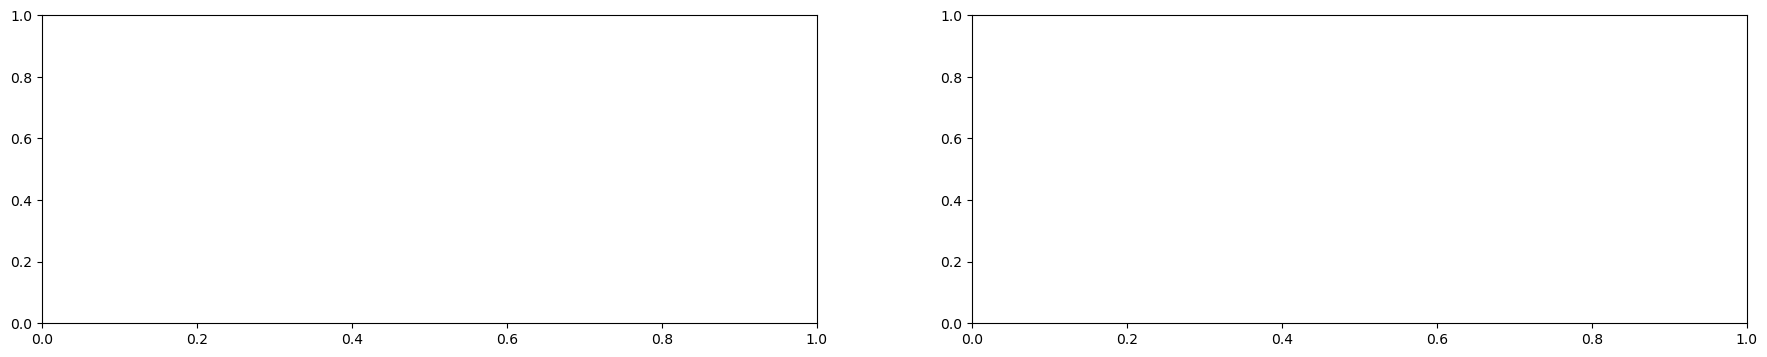

In [21]:

###################### Plotting train_val loss vs iterations #########################
fig, axs = plt.subplots(1,2, figsize=(22,4))

from_it = 0

axs[0].plot(model.history.history['loss'][from_it:])
axs[0].plot(model.history.history['val_loss'][from_it:])
axs[0].set_title('Learning curve')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Training iterations')
axs[0].legend(['Training set', 'Validation set'], loc='upper right')

axs[1].plot(model.history.history['r2'][from_it:])
axs[1].plot(model.history.history['val_r2'][from_it:])
axs[1].set_title('Learning curve')
axs[1].set_ylabel('r2')
axs[1].set_xlabel('Training iterations')
axs[1].legend(['Training set', 'Validation set'], loc='lower right')

plt.show()

In [25]:

#print(f"Train loss = {np.round(train_loss,decimals=5)}, Train accuracy = {np.round(train_acc, decimals=3)}")
#print(f"Dev loss = {np.round(dev_loss, decimals=5)}, Dev accuracy = {np.round(dev_acc, decimals=3)}")
#print(f"Test loss = {np.round(test_loss, decimals=5)}, Test accuracy = {np.round(test_acc, decimals=3)}")

print(f"Train loss = {np.round(train_loss,decimals=5)}")
print(f"Dev loss = {np.round(dev_loss, decimals=5)}")
print(f"Test loss = {np.round(test_loss, decimals=5)}")


Train loss = [0.09617 0.99986]
Dev loss = [0.09632 0.99945]
Test loss = [0.09622 0.99971]
